In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

## 데이터 불러오기

In [2]:
df = pd.read_csv('data/customer_data.csv', sep = '\t')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,9,4,2,0,0,0,0,0,0,11
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,8,5,7,1,0,0,0,0,0,11
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,2,13,1,0,0,0,1,0,0,11
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,6,10,2,0,0,0,0,0,0,11


## 결측값 확인하기
----
확인 결과, 연 소득 24개의 값이 결측값으로 확인되었음 
출생연도에 따라 연 소득이 달라질것으로 판단하여, 출생연도의 연 소득을 평균으로 결측값을 지정함

In [3]:
df.isna().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [4]:
nan_df = df[df['annual_income'].isna()]
nan_year_annaul_income = nan_df['birth_year'].unique()
nan_year_annaul_income

array([1991, 1994, 1967, 1959, 1990, 1981, 1965, 1969, 1971, 1997, 1978,
       1966, 1972, 1980, 1977, 1989, 1979, 1962, 1963, 1951, 1986])

In [5]:
nan_year_income_dic = {}
for temp_year in nan_year_annaul_income :
    temp_mean_income = df['annual_income'][df['birth_year'] == temp_year].mean()
    nan_year_income_dic[temp_year] = round(temp_mean_income,1)
nan_year_income_dic

{1991: 62395307.3,
 1994: 56350339.0,
 1967: 73221304.0,
 1959: 72799814.3,
 1990: 68488934.1,
 1981: 61385638.9,
 1965: 70226348.8,
 1969: 74309374.3,
 1971: 63460622.7,
 1997: 54925224.1,
 1978: 68114765.3,
 1966: 76184825.0,
 1972: 73416073.2,
 1980: 66460333.3,
 1977: 66567317.1,
 1989: 60963397.4,
 1979: 64161379.1,
 1962: 76216904.1,
 1963: 74894787.5,
 1951: 81021416.7,
 1986: 59816164.5}

In [6]:
df.loc[df['annual_income'].isna(), 'annual_income'] = df['birth_year'].map(nan_year_income_dic)

In [7]:
print(df.isna().sum())
df

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,9,4,2,0,0,0,0,0,0,11
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,8,5,7,1,0,0,0,0,0,11
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,2,13,1,0,0,0,1,0,0,11
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,6,10,2,0,0,0,0,0,0,11


## 총 구매 금액, 총 구매 횟수 계산

In [8]:
df['amount_total'] = df['amount_alcohol'] + df['amount_fruit'] + df['amount_meat'] \
                    + df['amount_fish'] + df['amount_snack'] + df['amount_general']
df['purchase_total'] = df['num_purchase_web'] + df['num_purchase_store']
df['promotion_total'] = df['promotion_1'] + df['promotion_2'] + df['promotion_3'] + df['promotion_4'] + \
                         df['promotion_5'] +  df['promotion_6']
df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,amount_total,purchase_total,promotion_total
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,0,0,0,0,0,1,11,2102100,12,1
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,0,0,0,0,0,0,11,35100,3,0
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,0,0,0,0,0,0,11,1008800,18,0
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,0,0,0,0,0,0,11,68900,6,0
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,0,0,0,0,0,0,11,548600,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,0,0,0,0,0,0,11,1743300,13,0
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,1,0,0,0,0,0,11,577200,13,1
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,0,0,0,1,0,0,11,1613300,15,1
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,0,0,0,0,0,0,11,1095900,16,0


## 연령, 소득, 가족 구성의 인구 통계학적으로 판단 & 이상값 제거

In [9]:
df['birth_year_group'] = pd.cut(df['birth_year'], 
                                bins=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], 
                                right=False, 
                                labels=['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s'])

In [10]:
# 이상치 함수
def outlier(temp_df, temp_column) :
    q1 = temp_df[temp_column].quantile(0.25)
    q3 = temp_df[temp_column].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    high_limit= q3 + 1.5 * iqr
    return low_limit, high_limit

(1940.0, 2012.0)
count    2240.000000
mean     1976.805804
std        11.984069
min      1901.000000
25%      1967.000000
50%      1978.000000
75%      1985.000000
max      2004.000000
Name: birth_year, dtype: float64


<AxesSubplot: >

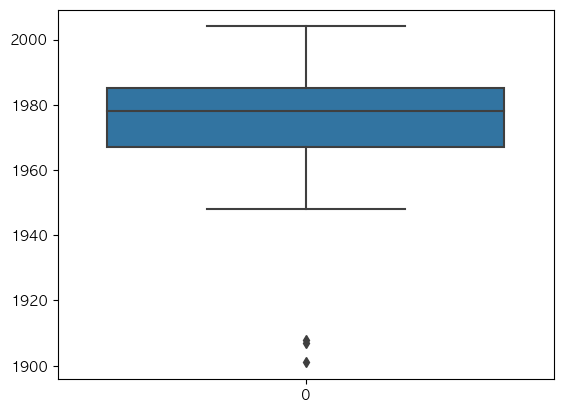

In [11]:
# 출생 연도의 이상치 분석 : 이상치 존재로 제거할 예정
print(outlier(df, 'birth_year'))
print(df['birth_year'].describe())
sns.boxplot(df['birth_year'])

In [12]:
df = df.drop(df[df['birth_year'] <= 1940].index)
df['birth_year'].describe()

count    2237.000000
mean     1976.901654
std        11.701917
min      1948.000000
25%      1967.000000
50%      1978.000000
75%      1985.000000
max      2004.000000
Name: birth_year, dtype: float64

In [13]:
# 출생연도보다 나이대를 확인하는게 낫다고 판단함
df['age'] = 2023 - df['birth_year']

In [14]:
age_bins = list(range(10, 81, 10))
age_labels = [f'{x}대' for x in age_bins[:-1]]
age_labels

['10대', '20대', '30대', '40대', '50대', '60대', '70대']

In [15]:
age_group = pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False)

df.insert(
    loc=df.columns.get_loc('age') + 1,
    column='age_group',
    value=age_group,
)
df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,promotion_4,promotion_5,promotion_6,revenue,amount_total,purchase_total,promotion_total,birth_year_group,age,age_group
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,0,0,1,11,2102100,12,1,1960s,58,50대
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,0,0,0,11,35100,3,0,1960s,61,60대
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,0,0,0,11,1008800,18,0,1970s,50,50대
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,0,0,0,11,68900,6,0,1990s,31,30대
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,0,0,0,11,548600,11,0,1980s,34,30대


In [16]:
age_group_replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상',
}
df['age_group'] = df['age_group'].replace(age_group_replace_dict)
df.head()

/var/folders/l2/03304mg17zzdfl01b3nwlqrr0000gn/T/ipykernel_2911/924110637.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['age_group'] = df['age_group'].replace(age_group_replace_dict)


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,promotion_4,promotion_5,promotion_6,revenue,amount_total,purchase_total,promotion_total,birth_year_group,age,age_group
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,0,0,1,11,2102100,12,1,1960s,58,50대
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,0,0,0,11,35100,3,0,1960s,61,60대 이상
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,0,0,0,11,1008800,18,0,1970s,50,50대
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,0,0,0,11,68900,6,0,1990s,31,30대
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,0,0,0,11,548600,11,0,1980s,34,30대


count    2.237000e+03
mean     6.790547e+07
std      3.256334e+07
min      2.249000e+06
25%      4.617990e+07
50%      6.680700e+07
75%      8.876530e+07
max      8.666658e+08
Name: annual_income, dtype: float64


<AxesSubplot: >

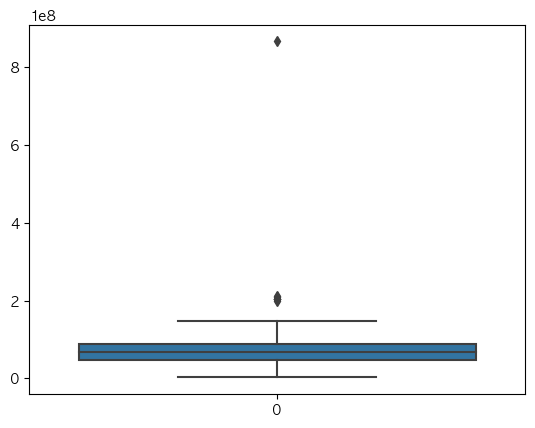

In [17]:
# 연 소득의 이상치 분석 : 이상치가 존재하나,고소득자로 판단 -> 통계값의 유의미성을 위해서 삭제하기로 함
lower_annual_income, higher_annual_income = outlier(df, 'annual_income')
print(df['annual_income'].describe())
sns.boxplot(df['annual_income'])

<AxesSubplot: >

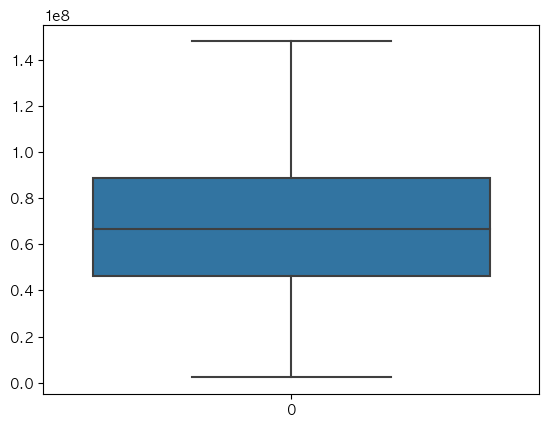

In [18]:
df = df.drop(df[ (df['annual_income'] <= lower_annual_income) | 
                 (df['annual_income'] >= higher_annual_income) ].index)
sns.boxplot(df['annual_income'])

(-1.5, 2.5)
count    2229.000000
mean        0.951996
std         0.751976
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: children, dtype: float64


<AxesSubplot: >

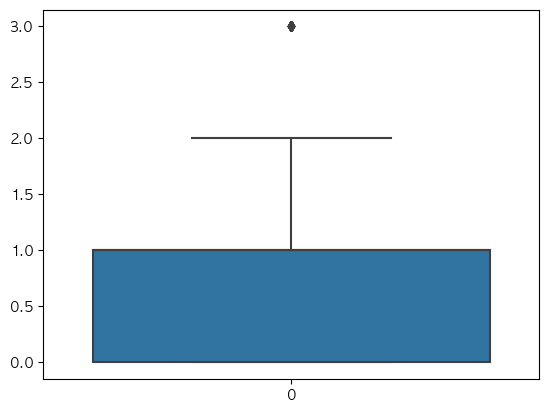

In [19]:
# 부양자녀수의 이상치 분석 : 이상치가 존재하나, 3명은 충분히 가능하다고 판단
print(outlier(df, 'children'))
print(df['children'].describe())
sns.boxplot(df['children'])

In [20]:
# 수익은 모두 같은 값으로 삭제
print(df['revenue'].describe())
df = df.drop(columns=['ID', 'revenue'])
df.head()

count    2229.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: revenue, dtype: float64


,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,promotion_3,promotion_4,promotion_5,promotion_6,amount_total,purchase_total,promotion_total,birth_year_group,age,age_group
0,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,...,0,0,0,1,2102100,12,1,1960s,58,50대
1,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,...,0,0,0,0,35100,3,0,1960s,61,60대 이상
2,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,0,0,0,0,1008800,18,0,1970s,50,50대
3,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,0,0,0,0,68900,6,0,1990s,31,30대
4,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,0,0,0,0,548600,11,0,1980s,34,30대


### 플랏으로 비율 확인하기
----
부양자녀수는 1명이 제일 많은 것으로 확인
출생 연도는 1970, 1980년대가 제일 많은 것으로 확인

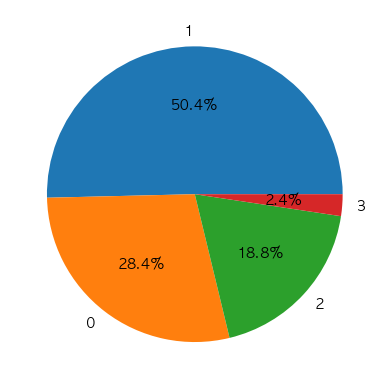

In [21]:
# 부양 자녀 수 확인
children_counts = df['children'].value_counts()

plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


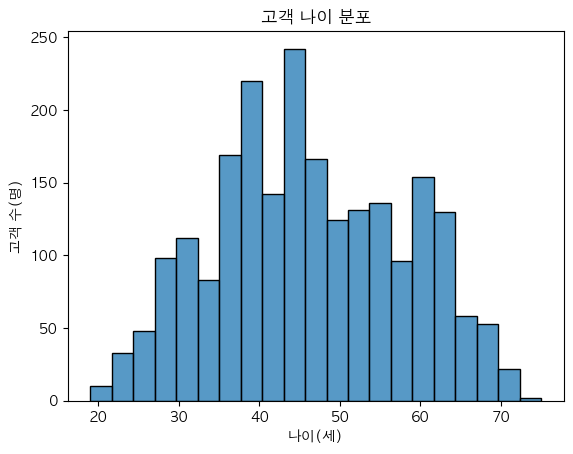

In [22]:
sns.histplot(data=df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')
plt.show()

## 상관관계 확인하기 (기준 : 0.65이상)
----
총 지출 금액은 주류, 육류와 큰 영향이 있는 것으로 확인되었고, 총 구매 횟수와도 큰 관련성이 있음 또한, 가게에서 직접 구매하는 경우가 더 많음
총 구매 횟수는 주류에 영향을 많이 받으며, 웹 페이지와 가게에 직접 방문한 경우가 많음
할인을 통한 구매 횟수는 매우 낮은 것으로 확인되었음. 앞으로 할인 행사를 적극적으로 활용할 필요가 있어 보임

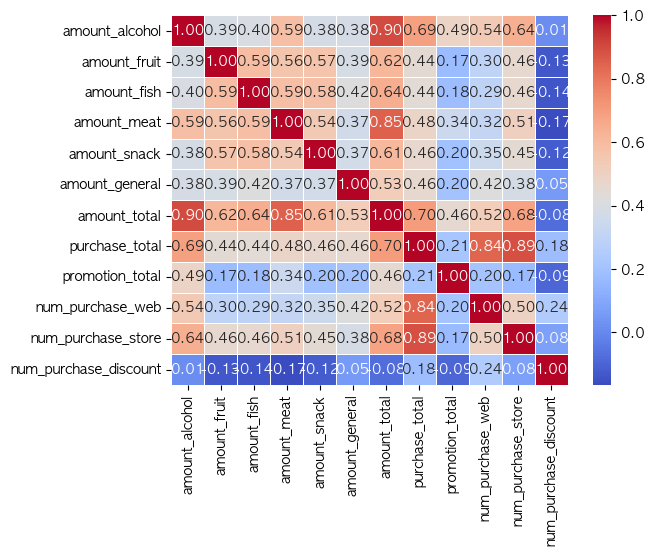

In [23]:
heatmap_data = df[['amount_alcohol', 'amount_fruit', 'amount_fish', 'amount_meat', 'amount_snack', 'amount_general', 
                   'amount_total', 'purchase_total', 'promotion_total', 
                   'num_purchase_web', 'num_purchase_store', 'num_purchase_discount']]
corr_matrix = heatmap_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# RFM 평가하기!

In [25]:
num_grades = 3
grade_labels = list(range(1, num_grades+1))
grade_labels

[1, 2, 3]

### Recency_grade

In [26]:
recency_grade = pd.qcut(x=df['recency'], q = num_grades, labels = grade_labels[::-1])
df['recency_grade'] = recency_grade
df.head()

,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,promotion_4,promotion_5,promotion_6,amount_total,purchase_total,promotion_total,birth_year_group,age,age_group,recency_grade
0,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,...,0,0,1,2102100,12,1,1960s,58,50대,2
1,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,...,0,0,0,35100,3,0,1960s,61,60대 이상,2
2,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,0,0,0,1008800,18,0,1970s,50,50대,3
3,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,0,0,0,68900,6,0,1990s,31,30대,3
4,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,0,0,0,548600,11,0,1980s,34,30대,1


In [27]:
df['recency_grade'].value_counts()

recency_grade
3    758
1    742
2    729
Name: count, dtype: int64

In [28]:
groupby_recency_grade = df.groupby('recency_grade').sum(numeric_only=True).reset_index()
groupby_recency_grade

/var/folders/l2/03304mg17zzdfl01b3nwlqrr0000gn/T/ipykernel_2911/1144146915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_recency_grade = df.groupby('recency_grade').sum(numeric_only=True).reset_index()


,recency_grade,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,amount_total,purchase_total,promotion_total,age
0,3,1498850,5.098330e+10,686,12087,294780200,26795600,157946100,37685700,25937600,...,54,12,67,55,60,179,586216800,7557,427,34584
1,2,1440760,4.859658e+10,732,36135,294875100,23744500,154029200,35226100,25266800,...,47,8,47,53,48,95,574596100,7262,298,34007
2,1,1466875,5.001996e+10,704,61236,294118500,25810200,166968100,36164700,27501500,...,43,10,49,59,54,60,593863400,7276,275,34191


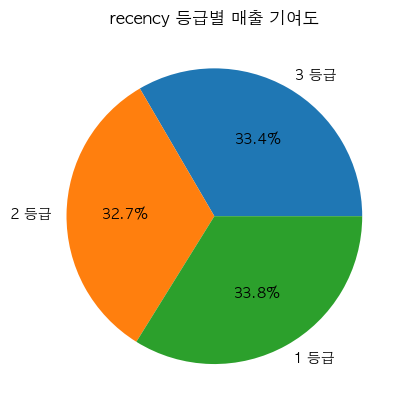

In [29]:
plt.pie(groupby_recency_grade['amount_total'], 
        labels=["{} 등급".format(grade) for grade in groupby_recency_grade['recency_grade']], autopct='%1.1f%%')
plt.title('recency 등급별 매출 기여도')
plt.show()

### Frequency_grade

In [30]:
frequency_grade = pd.qcut(x=df['purchase_total'], q = num_grades, labels = grade_labels[::-1])
df['frequency_grade'] = frequency_grade
df.head()

,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,promotion_5,promotion_6,amount_total,purchase_total,promotion_total,birth_year_group,age,age_group,recency_grade,frequency_grade
0,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,...,0,1,2102100,12,1,1960s,58,50대,2,2
1,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,...,0,0,35100,3,0,1960s,61,60대 이상,2,3
2,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,0,0,1008800,18,0,1970s,50,50대,3,1
3,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,0,0,68900,6,0,1990s,31,30대,3,3
4,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,0,0,548600,11,0,1980s,34,30대,1,2


In [31]:
df['frequency_grade'].value_counts()

frequency_grade
3    812
1    734
2    683
Name: count, dtype: int64

In [32]:
groupby_frequency_grade = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()
groupby_frequency_grade

/var/folders/l2/03304mg17zzdfl01b3nwlqrr0000gn/T/ipykernel_2911/496879277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_frequency_grade = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()


,frequency_grade,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,amount_total,purchase_total,promotion_total,age
0,3,1607515,3.435468e+10,1024,39910,27320800,4028700,20645300,6111300,4288700,...,0,3,65,6,0,72,76222900,3630,146,35161
1,2,1349328,5.106320e+10,566,34001,302205800,29238300,183240200,41961400,27277900,...,62,10,49,60,64,121,633184500,6609,366,32381
2,1,1449642,6.418197e+10,532,35547,554247200,43083300,275057900,61003800,47139300,...,82,17,49,101,98,141,1045268900,11856,488,35240


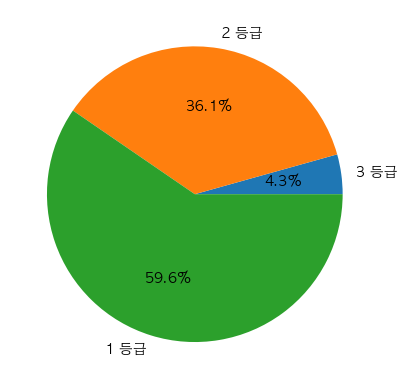

In [33]:
plt.pie(groupby_frequency_grade['amount_total'], 
        labels=["{} 등급".format(grade) for grade in groupby_frequency_grade['frequency_grade']], autopct='%1.1f%%')
plt.show()

### Monetary_grade

In [34]:
monetary_grade = pd.qcut(x=df['amount_total'], q = num_grades, labels = grade_labels[::-1])
df['monetary_grade'] = monetary_grade
df.head()

,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,promotion_6,amount_total,purchase_total,promotion_total,birth_year_group,age,age_group,recency_grade,frequency_grade,monetary_grade
0,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,...,1,2102100,12,1,1960s,58,50대,2,2,1
1,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,...,0,35100,3,0,1960s,61,60대 이상,2,3,3
2,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,0,1008800,18,0,1970s,50,50대,3,1,2
3,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,0,68900,6,0,1990s,31,30대,3,3,3
4,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,0,548600,11,0,1980s,34,30대,1,2,2


In [35]:
df['monetary_grade'].value_counts()

monetary_grade
3    744
1    743
2    742
Name: count, dtype: int64

In [36]:
groupby_monetary_grade = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()
groupby_monetary_grade

/var/folders/l2/03304mg17zzdfl01b3nwlqrr0000gn/T/ipykernel_2911/1160935500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_monetary_grade = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()


,monetary_grade,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,amount_total,purchase_total,promotion_total,age
0,3,1473232,3.044527e+10,957,36159,17503200,3146000,11733800,4604600,3273400,...,0,2,56,3,0,57,49829000,3300,118,31880
1,2,1465796,4.910419e+10,827,35837,214197100,16909100,84358300,23803000,17460300,...,15,4,42,56,8,91,399516000,8174,216,35270
2,1,1467457,7.005039e+10,338,37462,652073500,56295200,382851300,80668900,57972200,...,129,24,65,108,154,186,1305331300,10621,666,35632


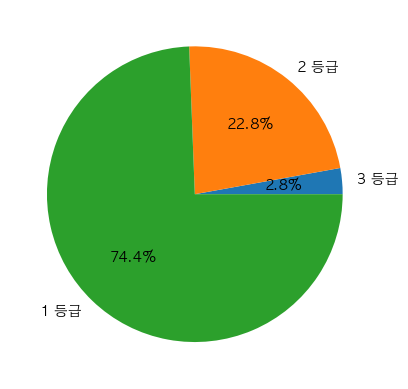

In [37]:
plt.pie(groupby_monetary_grade['amount_total'], 
        labels=["{} 등급".format(grade) for grade in groupby_monetary_grade['monetary_grade']], autopct='%1.1f%%')
plt.show()

### 가중합으로 세그먼트 분류하기

In [38]:
weight = {}
weight['recency'] = 1/3
weight['frequency'] = 1/3
weight['monetary'] = 1/3

In [39]:
df['rfm_score'] = (weight['recency'] * df['recency_grade'].astype('int') +
                   weight['frequency'] * df['frequency_grade'].astype('int') +
                   weight['monetary'] * df['monetary_grade'].astype('int'))
df

,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,amount_total,purchase_total,promotion_total,birth_year_group,age,age_group,recency_grade,frequency_grade,monetary_grade,rfm_score
0,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,...,2102100,12,1,1960s,58,50대,2,2,1,1.666667
1,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,...,35100,3,0,1960s,61,60대 이상,2,3,3,2.666667
2,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,1008800,18,0,1970s,50,50대,3,1,2,2.000000
3,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,68900,6,0,1990s,31,30대,3,3,3,3.000000
4,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,548600,11,0,1980s,34,30대,1,2,2,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,54600,...,1743300,13,0,1970s,48,40대,2,1,1,1.333333
2236,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,0,...,577200,13,1,1950s,69,60대 이상,2,1,2,1.666667
2237,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,41600,...,1613300,15,1,1980s,34,30대,1,1,1,1.000000
2238,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,104000,...,1095900,16,0,1960s,59,50대,3,1,1,1.666667


In [41]:
def modify_rfm_score(x) :
    if x < 5/3 :
        return 1
    elif x < 7/3 :
        return 2
    else :
        return 3

In [42]:
df['modify_rfm_score'] = df['rfm_score'].apply(modify_rfm_score)
df

,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,purchase_total,promotion_total,birth_year_group,age,age_group,recency_grade,frequency_grade,monetary_grade,rfm_score,modify_rfm_score
0,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,...,12,1,1960s,58,50대,2,2,1,1.666667,1
1,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,...,3,0,1960s,61,60대 이상,2,3,3,2.666667,3
2,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,18,0,1970s,50,50대,3,1,2,2.000000,2
3,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,6,0,1990s,31,30대,3,3,3,3.000000,3
4,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,11,0,1980s,34,30대,1,2,2,1.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,54600,...,13,0,1970s,48,40대,2,1,1,1.333333,1
2236,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,0,...,13,1,1950s,69,60대 이상,2,1,2,1.666667,1
2237,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,41600,...,15,1,1980s,34,30대,1,1,1,1.000000,1
2238,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,104000,...,16,0,1960s,59,50대,3,1,1,1.666667,1


In [43]:
df['modify_rfm_score'].value_counts()

modify_rfm_score
1    951
2    754
3    524
Name: count, dtype: int64

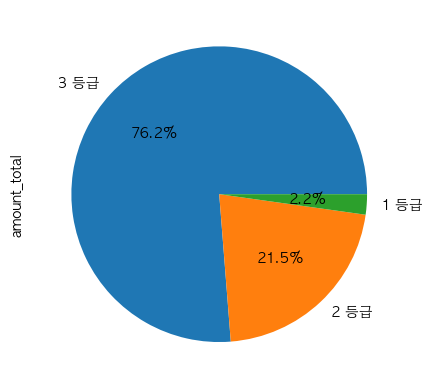

In [44]:
groupby_rfm_segment = df.groupby('modify_rfm_score').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(kind = 'pie', autopct = '%.1f%%', 
                                        labels=["{} 등급".format(grade) for grade in groupby_monetary_grade['monetary_grade']])
plt.show()

### RFM 결과 $ 1 \rightarrow 2 \rightarrow 3 $ 으로 갈수록 퍼센테이지가 적은것으로 확인할수있음